# Springboard API Mini-Project

Questions addressed in this project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).

2. Convert the returned JSON object into a Python dictionary.

3. Calculate what the highest and lowest opening prices were for the stock in this period.

4. What was the largest change in any one day (based on High and Low price)?

5. What was the largest change between any two days (based on Closing Price)?

6. What was the average daily trading volume during this year?

7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

Import relevant Python packages for computations

In [255]:
# Import relevant packages
import os, requests, json
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev

Get the API Key from the .env file in the current directory

In [265]:
# Get API Key from .env file
load_dotenv()
API_KEY = os.getenv('NASDAQ_API_KEY')

# Print the API key (line removed prior to upload)
# print(API_KEY)

Question 1: Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).

In [257]:
# Get data from Frankfurt Stock Exchange (FSE) for AFX_X for all of 2017

# Set query parameters
database_code = 'FSE'
dataset_code = 'AFX_X'
return_format = 'json'
start_date = "2017-01-01"
end_date = "2017-12-31"
transform = "none"
column_index = ""
column_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']
frequency = "daily"

# Execute API call
url = f"https://data.nasdaq.com/api/v3/datasets/{database_code}/{dataset_code}/data.{return_format}?start_date={start_date}&end_date={end_date}&column_names={column_names}&collapse={frequency}&transform={transform}&api_key={API_KEY}"
r = requests.get(url)

# Note the type of the returned request ('requests.models.Response')
print(type(r))

<class 'requests.models.Response'>


Question 2: Convert the returned JSON object into a Python dictionary.

In [258]:
# Convert the response to a Python dictionary
AFX_2017 = r.json()

# Note the type of the returned JSON object (Dict)
print(type(AFX_2017))

<class 'dict'>


Question 3: Calculate what the highest and lowest opening prices were for the stock in this period.

In [259]:
# Index dictionary for relevant data and set to data_2017
data_2017 = AFX_2017['dataset_data']['data']

# Create empty lists to iterate upon
AFX_prices = []
trading_dates = []

# Iterate through trading data
for item in data_2017:
    # Filter out missing values
    if item[1] !=  None:
        # Collect opening prices and trading dates for each date
        price = item[1]
        trading_date = item[0]
        # Append the price and date to the empty lists
        AFX_prices.append(price)
        trading_dates.append(trading_date)

# Print output
Q3_output = 'The maximum opening price of Carl Zeiss Meditec stock during 2017 was ${}, \
\nthe minimum opening price was ${}.'.format(max(AFX_prices),min(AFX_prices)) 
print(Q3_output)

The maximum opening price of Carl Zeiss Meditec stock during 2017 was $53.11, 
the minimum opening price was $34.0.


Question 4: What was the largest change in any one day (based on High and Low price)?

In [260]:
# Create empty lists to iterate upon
AFX_oneday_changes = []
daily_dates = []

# Iterate through trading data
for item in data_2017:
    # Filter out missing values
    if (item[2] !=  None) & (item[3] !=  None):
        # Calculate daily change based on the difference in high and low price
        daily_change = abs(item[2]-item[3])
        # Collect relevant dates
        date = item[0]
        # Append the change and date to the empty lists
        AFX_oneday_changes.append(daily_change)
        daily_dates.append(date)

# Calculate and clean the maximum daily difference result
max_oneday_diff = round(max(AFX_oneday_changes), 4) 
# Find the day the maximum difference occured via index
max_oneday_diff_date = daily_dates[AFX_oneday_changes.index(max(AFX_oneday_changes))]

# Print output
Q4_output = 'The largest one day change in the price of Carl Zeiss Meditec stock \
during 2017 was ${}, this occurred on {}.'.format(max_oneday_diff, max_oneday_diff_date) 
print(Q4_output)

The largest one day change in the price of Carl Zeiss Meditec stock during 2017 was $2.81, this occurred on 2017-05-11.


Question 5: What was the largest change between any two days (based on Closing Price)?

In [261]:
# Create empty lists to iterate upon
AFX_closing_prices = []
AFX_twoday_changes =[]

# Iterate through trading data 
for item in data_2017:
    # Filter out missing values
    if item[4] !=  None:
        # Collect the daily closing price
        closing_price = item[4]
        # Append the closing price to the empty list
        AFX_closing_prices.append(closing_price)

# Iterate through closing prices 
for i in range(0,len(AFX_closing_prices),1):
    # Filter for all closing prices except the last
    if i < len(AFX_closing_prices)-1:
        # Calculate the absolute change in closing price from the previous day and append to the list
        AFX_twoday_changes.append(abs(AFX_closing_prices[i]-AFX_closing_prices[i+1]))

# Calculate the maximum difference in closing price and which dates it occurred between via index
max_twoday_diff = round(max(AFX_twoday_changes), 4) 
max_twoday_diff_start = daily_dates[AFX_twoday_changes.index(max(AFX_twoday_changes))] 
max_twoday_diff_end = daily_dates[AFX_twoday_changes.index(max(AFX_twoday_changes))+1]      

# Print output
Q5_output = 'The largest two day change in the price of Carl Zeiss Meditec stock \
during 2017 was ${}, this occurred between {} and {}.'.format(max_twoday_diff, \
                                                              max_twoday_diff_end, max_twoday_diff_start ) 
print(Q5_output)


The largest two day change in the price of Carl Zeiss Meditec stock during 2017 was $2.56, this occurred between 2017-08-08 and 2017-08-09.


Question 6: What was the average daily trading volume during this year?

In [262]:
# Create an empty list to iterate upon
AFX_daily_volume = []

# Iterate through trading data
for item in data_2017:
    # Filter out missing values
    if item[5] !=  None:
        # Collect the daily trading volume
        daily_volume = item[6]
        # Append the daily trading volume to the empty list
        AFX_daily_volume.append(daily_volume)    

# Calcualte the mean, or average daily trading volume
avg_daily_volume = mean(AFX_daily_volume)
print('The average daily trading volume of Carl Zeiss Meditec stock during 2017 was {} shares.'.format(avg_daily_volume))

The average daily trading volume of Carl Zeiss Meditec stock during 2017 was 86348.0 shares.


Question 7: (Optional) What was the median trading volume during this year?

In [263]:
# Using the volume list from the previous step, calcualte the median daily trading volume
median_daily_volume = median(AFX_daily_volume)
print('The median daily trading volume of Carl Zeiss Meditec stock during 2017 was {} shares.'.format(median_daily_volume))

The median daily trading volume of Carl Zeiss Meditec stock during 2017 was 86348.0 shares.


Visualization: Plot timeseries of Carl Zeiss Meditec stock price for the year 2017.

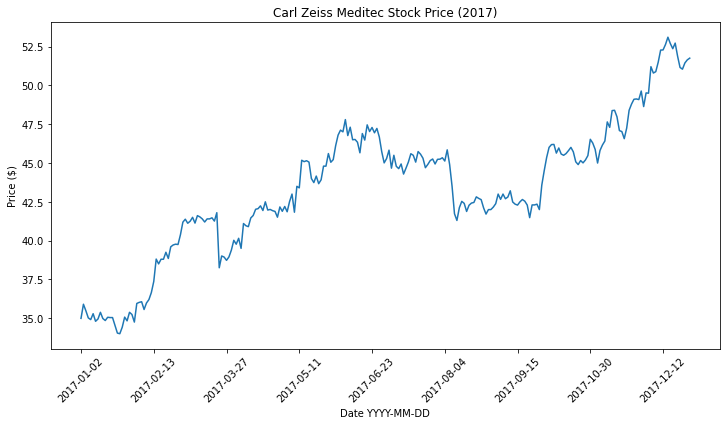

In [264]:
# Create figure and plot
fig = plt.subplots(figsize=(12, 6))
# Plot every 30th date on the x-axis for cleaner visualization
plt.xticks(np.arange(0, len(x)+1, 30))
# Reverse the order of the dates and values for correct plotting
plt.plot(trading_dates[::-1], AFX_prices[::-1])
plt.title('Carl Zeiss Meditec Stock Price (2017)')
plt.xticks(rotation = 45)
plt.xlabel('Date YYYY-MM-DD')
plt.ylabel('Price ($)')
plt.show()